### Demonstrate the use of dense neural networks for predicting numbers using the MNIST dataset.

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8723 - loss: 0.4372 - val_accuracy: 0.9602 - val_loss: 0.1348
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1149 - val_accuracy: 0.9709 - val_loss: 0.0922
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0725 - val_accuracy: 0.9788 - val_loss: 0.0704
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0522 - val_accuracy: 0.9785 - val_loss: 0.0741
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0365 - val_accuracy: 0.9779 - val_loss: 0.0723
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9725 - loss: 0.0884
Test loss: 0.0723 Test accuracy: 0.9919


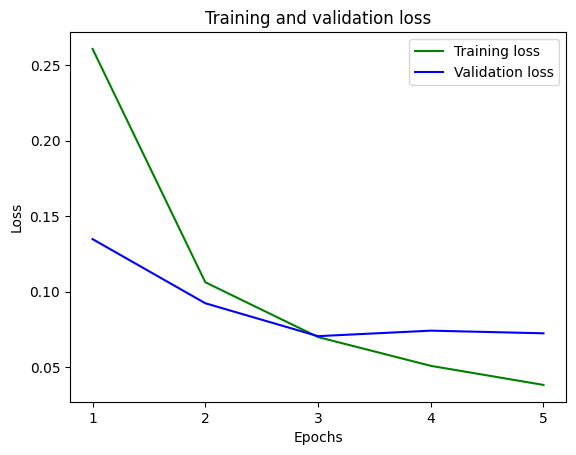

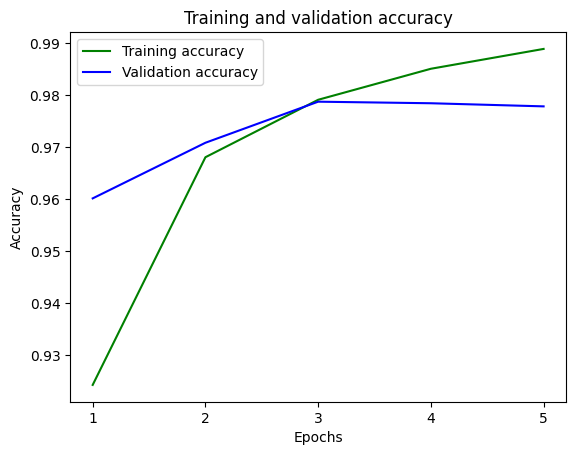

In [31]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical

%matplotlib inline 

# load image data - 60.000 training set to 10.000 test set of handwritten digits
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the images so that they fit the network input
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

# normalize the image data 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert the labels to categorical data types
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# initilaize new network model
# for image classifcation
model = models.Sequential()

# add the input layer - a dense layer, since it extracts feats from data
model.add(layers.Input(shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))

# there are 10 digits to be categorized (0-9), so use
# a dense layer (best works for final classifications)
# with softmax for their prediction
model.add(layers.Dense(10, activation='softmax'))

# compile the network
model.compile(
    optimizer='rmsprop', # version of SGD
    loss='categorical_crossentropy',
    metrics=['accuracy']           
)

# now train the neural network 
# on the prepared training data
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(
        test_images,
        test_labels
    )
)

# test the network performance - loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

### Demonstrate the use of convolutionsl neural networks for predicting numbers using the MNIST dataset.

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8708 - loss: 0.4121 - val_accuracy: 0.9854 - val_loss: 0.0442
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9850 - loss: 0.0481 - val_accuracy: 0.9897 - val_loss: 0.0327
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9902 - loss: 0.0328 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9927 - loss: 0.0252 - val_accuracy: 0.9913 - val_loss: 0.0261
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9944 - loss: 0.0197 - val_accuracy: 0.9919 - val_loss: 0.0281
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0344
Test loss: 0.0281 Test accuracy: 0.9919


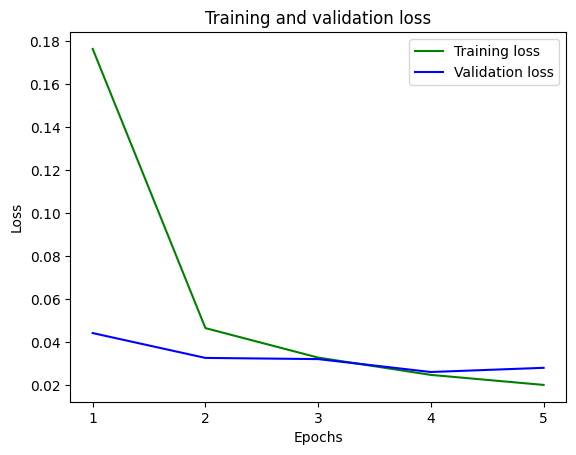

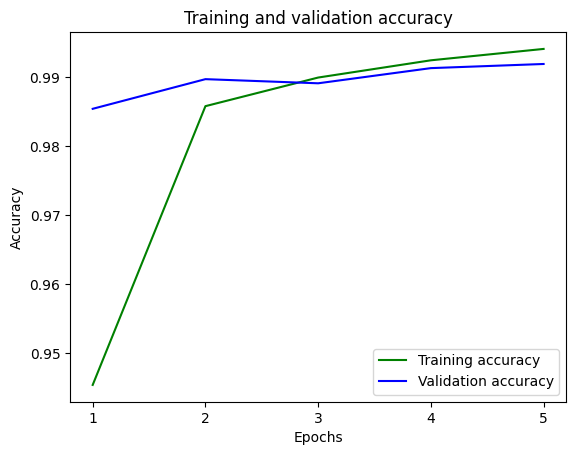

In [30]:
import matplotlib.pyplot as plt
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical

%matplotlib inline 

# load image data - 60.000 training set to 10.000 test set of handwritten digits
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the images so that they fit the network input
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000,28, 28, 1)

# normalize the image data 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert the labels to categorical data types
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# initilaize new CNN model
# for image classifcation
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1))) # grayscale images, hence 1 channel
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # recognizes small local patterns
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer

# dense layers work with 1D tensors so
# flatten the output of the last layer
model.add(layers.Flatten())

# now adding dense layers for classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 categories

# compile the model 
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']    
)

# start training the model
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(
        test_images,
        test_labels
    )
)

# evaluate the model in terms of accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()